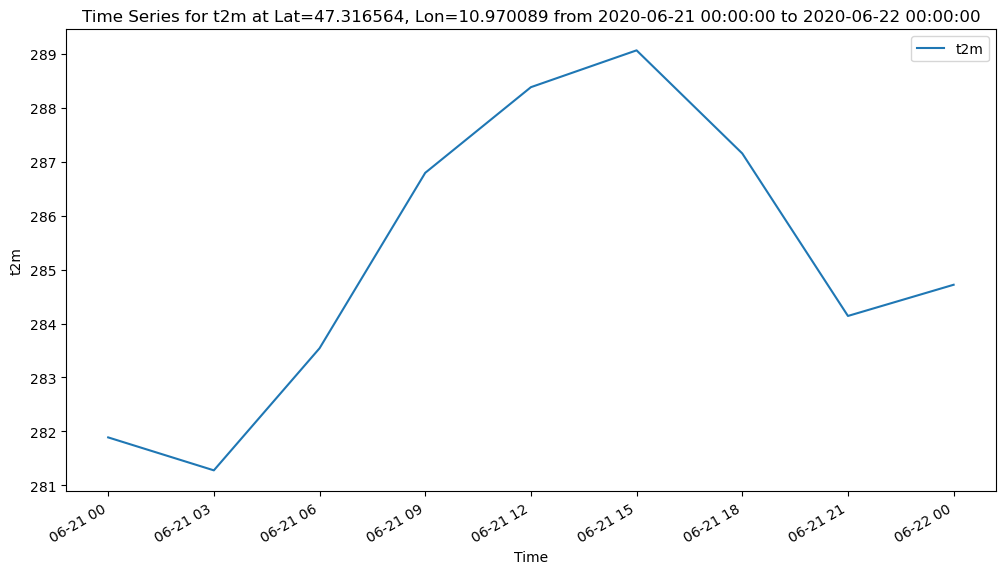

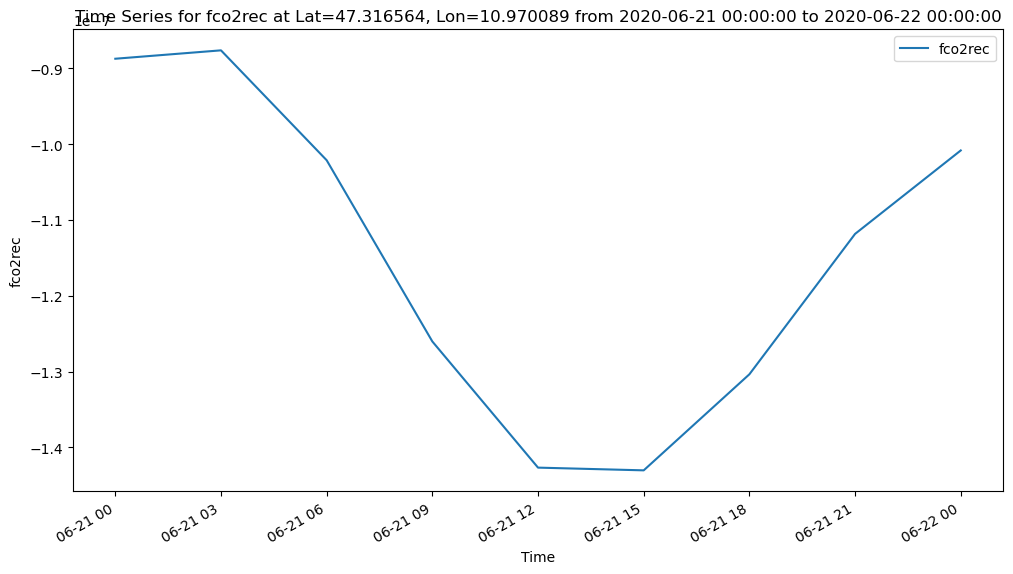

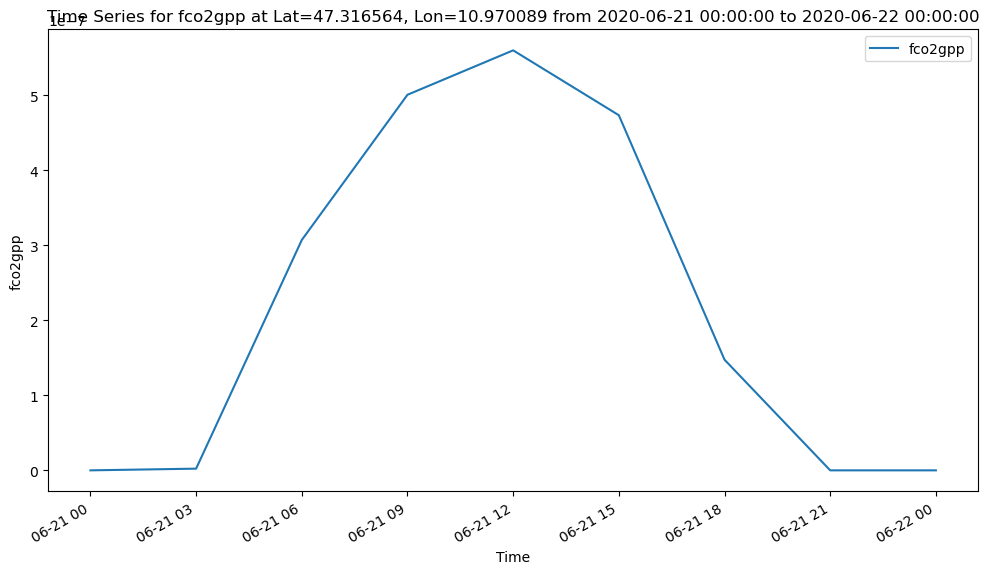

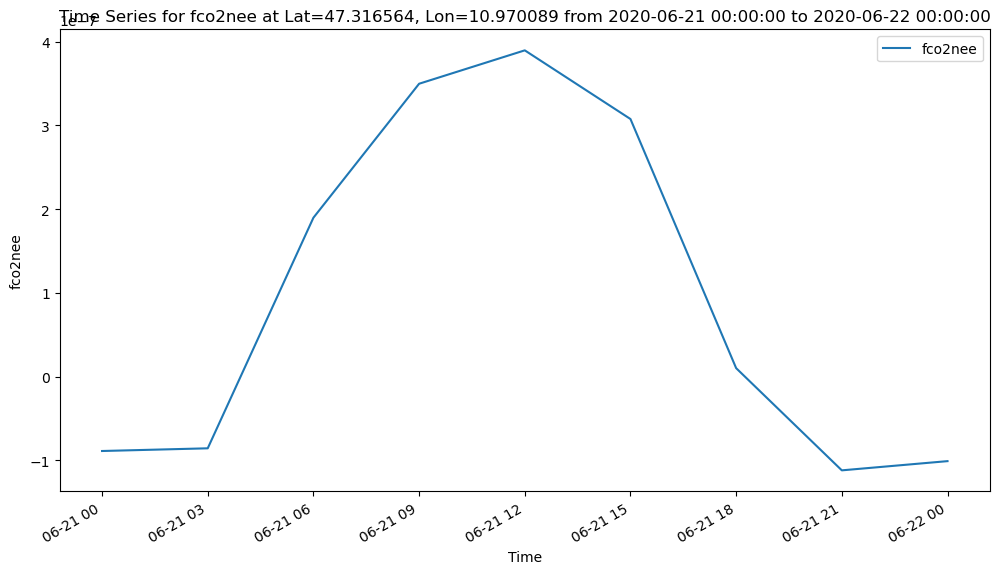

In [17]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the CAMS netCDF file
file_path = "/home/madse/Build_WRF/DATA/CAMS/ghg-reanalysis_lat43-51_lon5-17_2020-06-01_2020-06-30.nc"
data = xr.open_dataset(file_path)

# Extract variables and coordinates
lat_target, lon_target = 47.316564, 10.970089

# Find the nearest grid point to the target coordinates
lat_idx = abs(data.latitude - lat_target).argmin().values
lon_idx = abs(data.longitude - lon_target).argmin().values

# Extract time series for the specified variables at the target coordinates
variables = ["t2m", "fco2rec", "fco2gpp", "fco2nee"]

# Select start and end dates and times
start_date = "2020-06-21 00:00:00"
end_date = "2020-06-22 00:00:00"

for variable in variables:
    ts_data = data[variable].sortby("time").sel(time=slice(start_date, end_date))[:, lat_idx, lon_idx]

    # Plot time series
    plt.figure(figsize=(12, 6))
    ts_data.plot(label=variable)
    plt.title(f"Time Series for {variable} at Lat={lat_target}, Lon={lon_target} from {start_date} to {end_date}")
    plt.xlabel("Time")
    plt.ylabel(variable)
    plt.legend()
    plt.show()


In [22]:
import math

resolution = 1#0.75
latitude = 47  # in degrees
degree_of_latitude_in_km = 111  # average value, can be adjusted for specific location

distance_at_47N = degree_of_latitude_in_km / math.cos(math.radians(latitude)) 

print(f"The distance covered by {resolution} degree of latitude at 47°N is approximately {distance_at_47N* resolution:.2f} km.")


The distance covered by 1 degree of latitude at 47°N is approximately 162.76 km.


In [25]:
import math

resolution_deg = 0.75
average_distance_equator = 110  # in km

latitude = 47  # in degrees

distance_at_47N = resolution_deg * average_distance_equator * math.cos(math.radians(latitude))

print(f"The approximate distance covered by 0.75° resolution at 47°N is {distance_at_47N:.2f} km.")


The approximate distance covered by 0.75° resolution at 47°N is 56.26 km.


In [27]:
mass_flux_kg_m2_s = 0.001  # Example mass flux in kg m⁻² s⁻¹
avogadro_constant = 6.022e23  # Avogadro constant in mol⁻¹
molar_mass_kg_mol = 0.018  # Example molar mass in kg mol⁻¹ (for water)

flux_umol_m2_s = (mass_flux_kg_m2_s * avogadro_constant) / molar_mass_kg_mol

print(f"Flux in μmol m⁻² s⁻¹: {flux_umol_m2_s:.2f}")


Flux in μmol m⁻² s⁻¹: 33455555555555559866368.00


In [28]:
import xarray as xr

# CAMS data
file_path = "/home/madse/Build_WRF/DATA/CAMS/ghg-reanalysis_lat43-51_lon5-17_2020-06-01_2020-06-30.nc"
CAMS_data = xr.open_dataset(file_path)

# Print global attributes
print("Global attributes:")
print(CAMS_data.attrs)

# Print dimensions and their attributes
for dim in CAMS_data.dims:
    print(f"Dimension {dim}:")
    print(f"\tSize: {len(CAMS_data[dim])}")
    print(f"\tAttributes: {CAMS_data[dim].attrs}")

# Print variables and their attributes
for var in CAMS_data.data_vars:
    print(f"Variable {var}:")
    print(f"\tDimensions: {CAMS_data[var].dims}")
    print(f"\tShape: {CAMS_data[var].shape}")
    print(f"\tAttributes: {CAMS_data[var].attrs}")

Global attributes:
{'Conventions': 'CF-1.6', 'history': '2023-12-24 10:16:35 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data9/adaptor.mars_constrained.external-1703412991.0829744-15310-11-23a6b521-9430-4441-b265-f96e23123c65.nc /cache/tmp/23a6b521-9430-4441-b265-f96e23123c65-adaptor.mars_constrained.external-1703409206.773662-15310-12-tmp.grib'}
Dimension longitude:
	Size: 17
	Attributes: {'units': 'degrees_east', 'long_name': 'longitude'}
Dimension latitude:
	Size: 11
	Attributes: {'units': 'degrees_north', 'long_name': 'latitude'}
Dimension time:
	Size: 240
	Attributes: {'long_name': 'time'}
Variable d2m:
	Dimensions: ('time', 'latitude', 'longitude')
	Shape: (240, 11, 17)
	Attributes: {'units': 'K', 'long_name': '2 metre dewpoint temperature'}
Variable t2m:
	Dimensions: ('time', 'latitude', 'longitude')
	Shape: (240, 11, 17)
	Attributes: {'units': 'K', 'long_name': '2 metre temperature'}
Variable aco2rec:
	Dimensions: ('time', 'lat